# Matrix Factorization using Bregman Divergenses

## Testing NMF class

In [1]:
from sklearn.decomposition import NMF as nmfsk
from MatrixFactorization import NMF as nmfmy
import numpy as np
from numpy.random import RandomState
from sklearn.metrics import mean_squared_error
from math import sqrt
from scipy.stats import bernoulli
import matplotlib.pyplot as plt

## 1. Bernoulli Distribution

##### Using Numpy Random Bernoulli

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


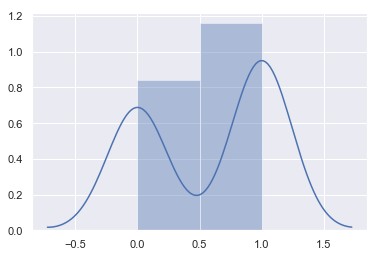

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
rs = RandomState(76321654)
V = rs.binomial(1,0.6,10000).reshape(200,50)
sns.set(color_codes=True)
sns.distplot(V[4])

#### Using Scipy Stats Bernoulli

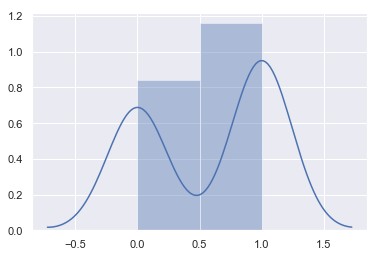

In [3]:
rs = RandomState(76321654)
r = bernoulli.rvs(0.6, size = 10000,  random_state= rs).reshape(200,50)
sns.set(color_codes=True)
sns.distplot(r[4])

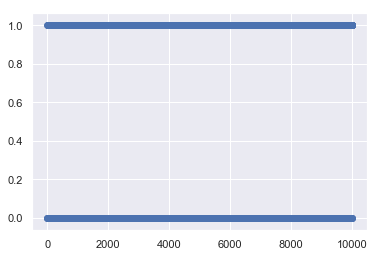

In [4]:
plt.scatter(range(0,V.shape[0] * V.shape[1]),V.flatten(), alpha=1)
plt.show()

### 1.2 Test NMF for Data coming from Binomail Distribution

In [57]:
p = 0.5
rs = RandomState(76321654)
V = bernoulli.rvs(p, size = 10000,  random_state= rs).reshape(200,50)
n = 10

##### Test the cast function

In [58]:
from MatrixFactorization.NMF import cast_to_limit
B = np.random.random_sample((200,10))
C = np.random.random_sample((10,50))

dot_product = cast_to_limit(B,C,1)

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


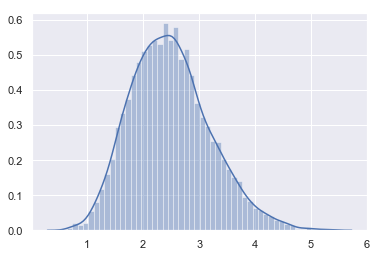

In [59]:
sns.set(color_codes=True)
sns.distplot((B.dot(C)).flatten(), label='original')

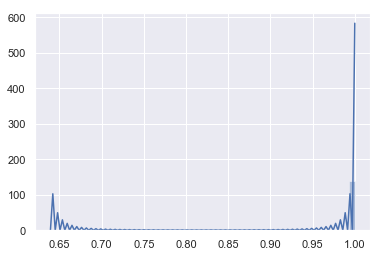

In [60]:
sns.distplot(dot_product.flatten(), label='dot_product')

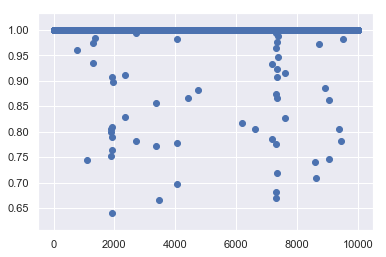

In [61]:
plt.scatter(range(0,dot_product.shape[0]*dot_product.shape[1]),dot_product, alpha=1)
plt.show()

#### LOG Likelihood for Bernoulli

In [62]:
import math
def neg_log_likelihood_bernoulli(V,W,H,p=0.6):
    
    A = W.dot(H)
    indices = np.where(A>=1)
    A[indices] = 1 - 1e-5
    likelihoods = np.power(A,V) * np.power(1-A,1-V)
    log_likelihhods = np.log(likelihoods)
    neg_logs = - log_likelihhods
    
    return np.sum(neg_logs)



In [63]:
import math
def neg_log_likelihood_bernoulli(V,W,H,p=0.6):
    
    A = W.dot(H)
    #indices = np.where(A>=1)
    #A[indices] = 1 - 1e-5
    logs_likelihoods = bernoulli.logpmf(V,A)
    neg_logs = - logs_likelihoods
    
    return np.sum(neg_logs)

### Sklearn Implementation

In [64]:
rs = RandomState(76321654)
nmfS = nmfsk(n_components=n,random_state=rs)
Ws = nmfS.fit_transform(V)
Hs = nmfS.components_

diffS = mean_squared_error(V, Ws.dot(Hs))
print('Mean Squared Error Between Sklearn Results and V :' + str(diffS))
diffS = neg_log_likelihood_bernoulli(V, Ws, Hs)
print('Average Negative Log Likelihood Between Sklearn Results and V :' + str(diffS))

Mean Squared Error Between Sklearn Results and V :0.1749544155947639
Average Negative Log Likelihood Between Sklearn Results and V :nan


### My Implementation Bernoulli

In [65]:
## Test the zeta function first to be in the domain [0,1]
rs = RandomState(76321654)
nmfM = nmfmy(n_components=n,random_state=rs, distribution = 'bernoulli', phi_update=True, max_iterations=0)
W, H = nmfM.fit_transform(V)

In [66]:
W.dot(H)

array([[0.00044493, 0.00035659, 0.00047878, ..., 0.00038926, 0.00031602,
        0.00047074],
       [0.00031908, 0.00031762, 0.00039849, ..., 0.00023812, 0.0002622 ,
        0.00029642],
       [0.00034372, 0.00030888, 0.00031576, ..., 0.00028138, 0.00025333,
        0.00035398],
       ...,
       [0.00022723, 0.00018506, 0.00029861, ..., 0.00022006, 0.00020082,
        0.00027197],
       [0.00039886, 0.00032202, 0.00038576, ..., 0.00024062, 0.00022976,
        0.00033717],
       [0.00022872, 0.00018762, 0.00025382, ..., 0.00018702, 0.00018007,
        0.00026252]])

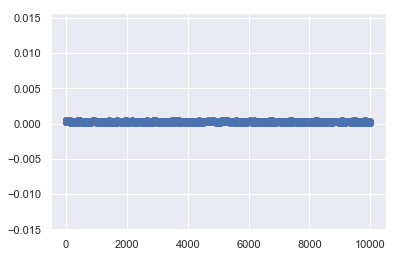

In [67]:
dot_product = cast_to_limit(W,H,1)
plt.scatter(range(0,dot_product.shape[0]*dot_product.shape[1]),dot_product, alpha=1)
plt.show()

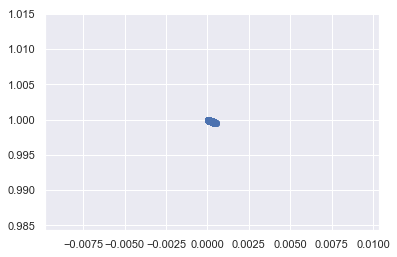

In [68]:
plt.scatter(dot_product,(1-dot_product), alpha=1)
plt.show()

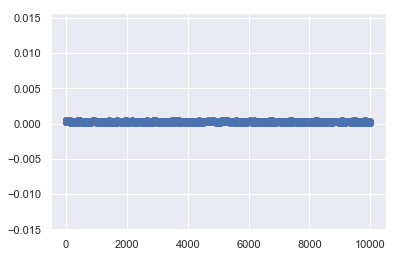

In [69]:
from MatrixFactorization.NMF import binomial_apply_zeta
applied = np.divide(1,np.multiply(dot_product,1-dot_product))
plt.scatter(range(0,applied.shape[0]*applied.shape[1]),dot_product, alpha=1)
plt.show()

In [70]:
applied = binomial_apply_zeta(W,H,1)
H = np.multiply(H, np.divide( W.T.dot(np.multiply( applied, V )) , W.T.dot(np.multiply( applied, W.dot(H) )) ) )

applied = binomial_apply_zeta(W,H,1)
W = np.multiply(W, np.divide(np.multiply( applied, V ).dot(H.T), np.multiply( applied, W.dot(H) ).dot(H.T)  ) )


In [71]:
W.dot(H)

array([[0.46647081, 0.4521684 , 0.51135593, ..., 0.451609  , 0.48793122,
        0.55056214],
       [0.53075692, 0.61861968, 0.64385729, ..., 0.44406745, 0.63667026,
        0.55340346],
       [0.3778888 , 0.40284327, 0.34489532, ..., 0.34128805, 0.39393275,
        0.43257233],
       ...,
       [0.37708332, 0.36751971, 0.4755813 , ..., 0.39056425, 0.48281268,
        0.48161989],
       [0.5776145 , 0.55258787, 0.57259871, ..., 0.40555819, 0.49900641,
        0.55971175],
       [0.30659142, 0.29339276, 0.32852848, ..., 0.27217859, 0.34567133,
        0.38154924]])

In [72]:
indices = np.where(W.dot(H)>1)
print(indices)
for (i,c) in zip(indices[0],indices[1]):
    H[:,c] = H[:,c] / (n/2)
indices = np.where(W.dot(H)>1)    
print(indices)

(array([], dtype=int64), array([], dtype=int64))
(array([], dtype=int64), array([], dtype=int64))


In [73]:
rs = RandomState(76321654)
nmfM = nmfmy(n_components=n,random_state=rs, distribution = 'bernoulli', phi_update=True, max_iterations=100)
W, H = nmfM.fit_transform(V)
diffM = mean_squared_error(V, W.dot(H))
print('Mean Squared Error Between My Results and V :' + str(diffM))
diffS = neg_log_likelihood_bernoulli(V, W, H)
print('Average Negative Log Likelihood Between Sklearn Results and V :' + str(diffS))

Mean Squared Error Between My Results and V :0.19339146704501028
Average Negative Log Likelihood Between Sklearn Results and V :5635.332514940705


In [74]:
W.dot(H)

array([[0.4210222 , 0.54295161, 0.49592196, ..., 0.27219986, 0.63572424,
        0.53275314],
       [0.65055293, 0.51580635, 0.45260437, ..., 0.35766845, 0.26551737,
        0.64829991],
       [0.28393421, 0.41381372, 0.17727969, ..., 0.16687987, 0.1166583 ,
        0.39827367],
       ...,
       [0.79988613, 0.68688704, 0.20777376, ..., 0.30256673, 0.47189988,
        0.27695872],
       [0.68145618, 0.90592145, 0.78506225, ..., 0.40652181, 0.41133369,
        0.51722883],
       [0.45430782, 0.24495415, 0.37391231, ..., 0.34209538, 0.54953539,
        0.25870335]])

### Combination of My and Sklearn

In [75]:
from MatrixFactorization import myNMF as nmfmy2
rs = RandomState(76321654)
nmfM2 = nmfmy2(n_components=n,random_state=rs, distribution = 'bernoulli')
W2 = nmfM2.fit_transform(V)
H2 = nmfM2.components_

diffM2 =mean_squared_error(V, W2.dot(H2))
print('Mean Squared Error Between My Results and V :' + str(diffM2))
diffS = neg_log_likelihood_bernoulli(V, W2, H2)
print('Average Negative Log Likelihood Between Sklearn Results and V :' + str(diffS))

Mean Squared Error Between My Results and V :0.1975957009296611
Average Negative Log Likelihood Between Sklearn Results and V :nan


### Compare the three Approaches

In [76]:
errorssk = np.zeros(50)
errorsmy = np.zeros(50)
errorsComb = np.zeros(50)

lsk = np.zeros(50)
lmy = np.zeros(50)
lComb = np.zeros(50)



for n in range(1, 51):
    print(n)
    rs = RandomState(76321654)
    
    # Sklearn
    nmfS = nmfsk(n_components=n,random_state=rs)
    Ws = nmfS.fit_transform(V)
    Hs = nmfS.components_
    
    
    #My  Bernoulli
    
    
    rs = RandomState(76321654)
    nmfM = nmfmy(n_components=n,random_state=rs,  distribution = 'bernoulli', phi_update=True)
    W, H = nmfM.fit_transform(V)
    
   
    
    #Combination Bernoulli
    rs = RandomState(76321654)
    nmfM2 = nmfmy2(n_components=n,random_state=rs, distribution = 'bernoulli')
    W2 = nmfM2.fit_transform(V)
    H2 = nmfM2.components_
    
    
    # Mean Squared Errors
    diffS = mean_squared_error(V, Ws.dot(Hs))
    errorssk[n-1] = diffS
    
   
    diffM = mean_squared_error(V, W.dot(H))
    errorsmy[n-1] = diffM
    
   
    diffM2 =mean_squared_error(V, W2.dot(H2))
    errorsComb[n-1] = diffM2
    
    # Average Negative log likelihood
    diffS = neg_log_likelihood_bernoulli(V, Ws, Hs)
    lsk[n-1] = diffS / (V.shape[0] * V.shape[1])
    
    
    diffM = neg_log_likelihood_bernoulli(V, W, H)
    lmy[n-1] = diffM / (V.shape[0] * V.shape[1])
    
    
    diffM2 = neg_log_likelihood_bernoulli(V, W2 , H2)
    lComb[n-1] = diffM2 / (V.shape[0] * V.shape[1])
    
    
    

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50


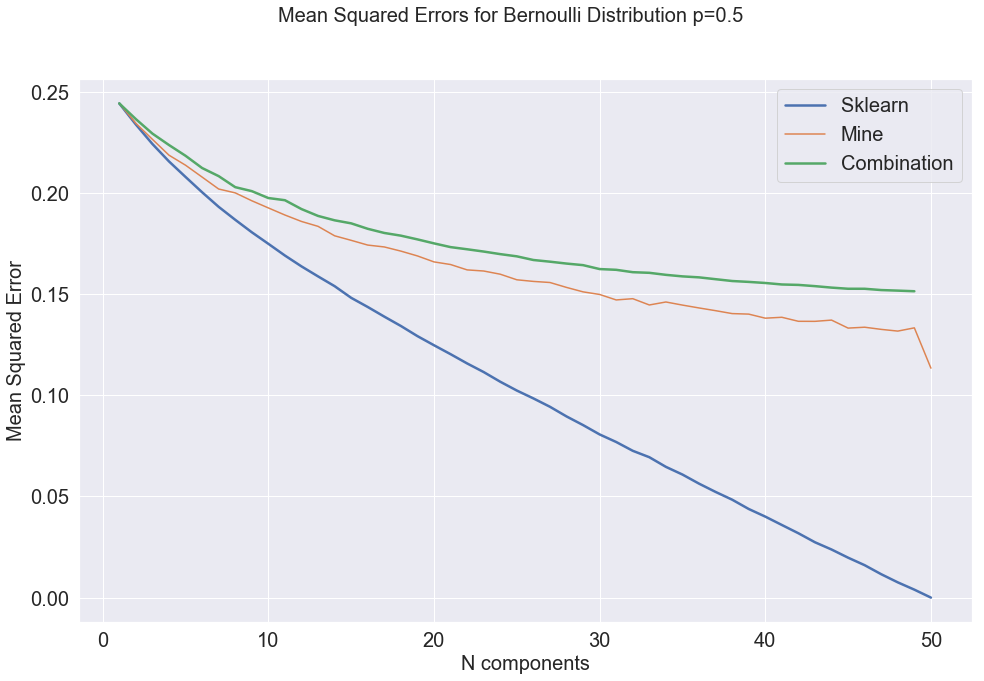

In [77]:
fig_1 = plt.figure(figsize=(16, 10))
ax_1 = fig_1.add_subplot(111)
    
ax_1.plot(np.arange(1, 51), 
                  errorssk, label="Sklearn ", linewidth=2.5)

ax_1.plot(np.arange(1, 51), 
                 errorsmy, label="Mine")

ax_1.plot(np.arange(1, 50), 
                  errorsComb[:-1], label="Combination", linewidth=2.5)

for item in ([ax_1.title, ax_1.xaxis.label, ax_1.yaxis.label] +
             ax_1.get_xticklabels() + ax_1.get_yticklabels()):
    item.set_fontsize(20)
    
ax_1.legend(loc=0, fontsize = 20)
plt.rcParams['axes.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.rcParams['axes.edgecolor'] = 'black'

ax_1.set_xlabel('N components')
ax_1.set_ylabel('Mean Squared Error')
fig_1.suptitle('Mean Squared Errors for Bernoulli Distribution p=0.5', fontsize = 20)
fig_1.savefig('BernoulliGraphs/MeanSquaredErrorsForNMFBernoulliFurther p=0.5.pdf')


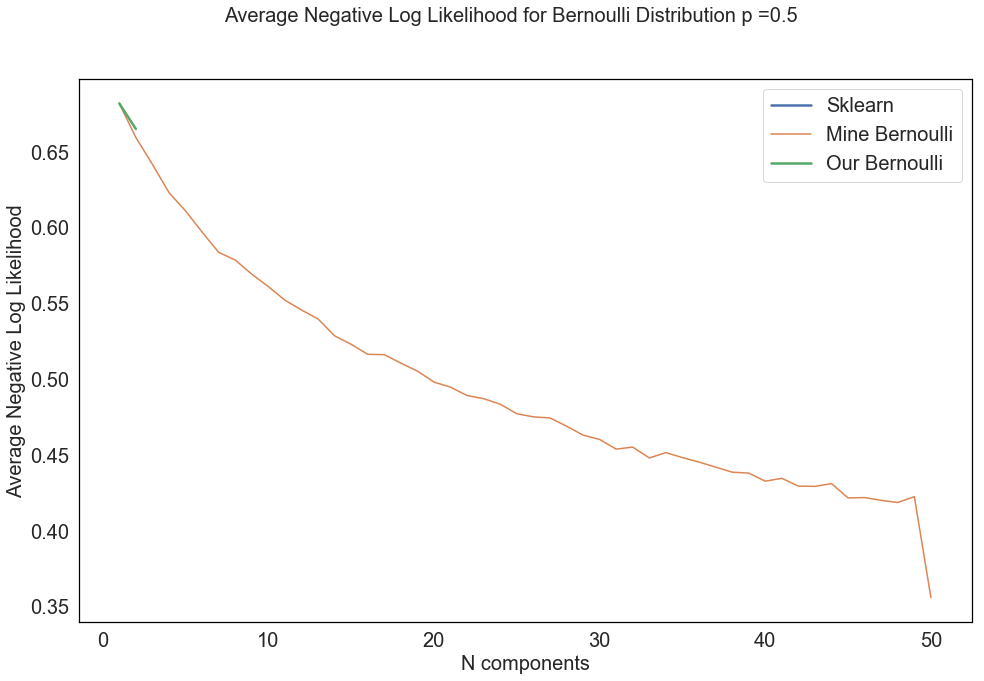

In [78]:
fig_1 = plt.figure(figsize=(16, 10))
ax_1 = fig_1.add_subplot(111)
    
ax_1.plot(np.arange(1, 51), 
                  lsk, label="Sklearn", linewidth=2.5)

ax_1.plot(np.arange(1, 51), 
                 lmy, label="Mine Bernoulli")

ax_1.plot(np.arange(1, 50), 
                 lComb[:-1], label="Our Bernoulli", linewidth=2.5)

for item in ([ax_1.title, ax_1.xaxis.label, ax_1.yaxis.label] +
             ax_1.get_xticklabels() + ax_1.get_yticklabels()):
    item.set_fontsize(20)
    
ax_1.legend(loc=0, fontsize = 20)
plt.rcParams['axes.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.rcParams['axes.edgecolor'] = 'black'

ax_1.set_xlabel('N components')
ax_1.set_ylabel('Average Negative Log Likelihood')
fig_1.suptitle('Average Negative Log Likelihood for Bernoulli Distribution p =0.5', fontsize = 20)
fig_1.savefig('BernoulliGraphs/BernoulliNMFAvgNegLogLikelihoodp=0.5.pdf')

In [52]:
p = 0.7
rs = RandomState(76321654)
V = bernoulli.rvs(p, size = 10000,  random_state= rs).reshape(200,50)
n = 10

In [53]:
errorssk = np.zeros(50)
errorsmy = np.zeros(50)
errorsComb = np.zeros(50)

lsk = np.zeros(50)
lmy = np.zeros(50)
lComb = np.zeros(50)



for n in range(1, 51):
    print(n)
    rs = RandomState(76321654)
    
    # Sklearn
    nmfS = nmfsk(n_components=n,random_state=rs)
    Ws = nmfS.fit_transform(V)
    Hs = nmfS.components_
    
    
    #My  Bernoulli
    
    
    rs = RandomState(76321654)
    nmfM = nmfmy(n_components=n,random_state=rs,  distribution = 'bernoulli', phi_update=True)
    W, H = nmfM.fit_transform(V)
    
   
    
    #Combination Bernoulli
    rs = RandomState(76321654)
    nmfM2 = nmfmy2(n_components=n,random_state=rs, distribution = 'bernoulli')
    W2 = nmfM2.fit_transform(V)
    H2 = nmfM2.components_
    
    
    # Mean Squared Errors
    diffS = mean_squared_error(V, Ws.dot(Hs))
    errorssk[n-1] = diffS
    
   
    diffM = mean_squared_error(V, W.dot(H))
    errorsmy[n-1] = diffM
    
   
    diffM2 =mean_squared_error(V, W2.dot(H2))
    errorsComb[n-1] = diffM2
    
    # Average Negative log likelihood
    diffS = neg_log_likelihood_bernoulli(V, Ws, Hs)
    lsk[n-1] = diffS / (V.shape[0] * V.shape[1])
    
    
    diffM = neg_log_likelihood_bernoulli(V, W, H)
    lmy[n-1] = diffM / (V.shape[0] * V.shape[1])
    
    
    diffM2 = neg_log_likelihood_bernoulli(V, W2 , H2)
    lComb[n-1] = diffM2 / (V.shape[0] * V.shape[1])
    
    
    

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50


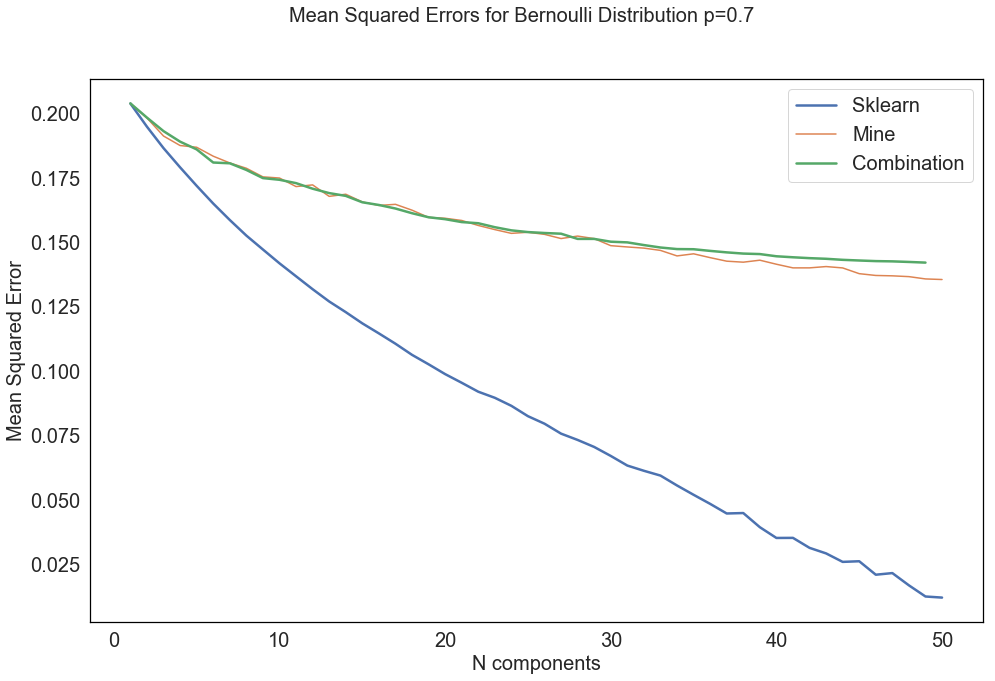

In [54]:
fig_1 = plt.figure(figsize=(16, 10))
ax_1 = fig_1.add_subplot(111)
    
ax_1.plot(np.arange(1, 51), 
                  errorssk, label="Sklearn ", linewidth=2.5)

ax_1.plot(np.arange(1, 51), 
                 errorsmy, label="Mine")

ax_1.plot(np.arange(1, 50), 
                  errorsComb[:-1], label="Combination", linewidth=2.5)

for item in ([ax_1.title, ax_1.xaxis.label, ax_1.yaxis.label] +
             ax_1.get_xticklabels() + ax_1.get_yticklabels()):
    item.set_fontsize(20)
    
ax_1.legend(loc=0, fontsize = 20)
plt.rcParams['axes.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.rcParams['axes.edgecolor'] = 'black'

ax_1.set_xlabel('N components')
ax_1.set_ylabel('Mean Squared Error')
fig_1.suptitle('Mean Squared Errors for Bernoulli Distribution p=0.7', fontsize = 20)
fig_1.savefig('BernoulliGraphs/MeanSquaredErrorsForNMFBernoulliFurther p=0.7.pdf')

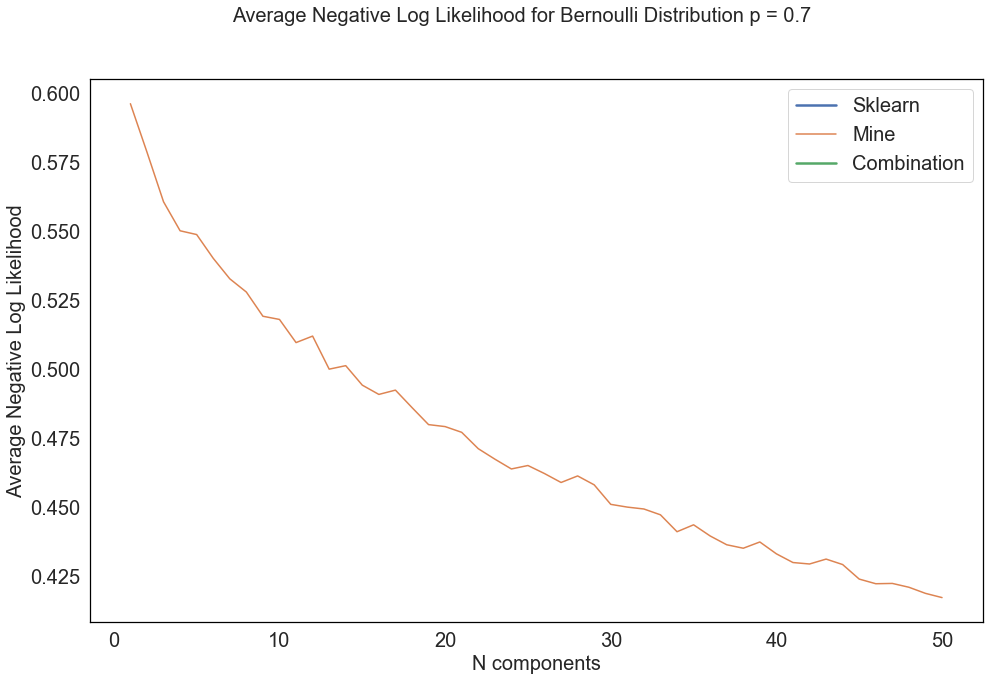

In [56]:
fig_1 = plt.figure(figsize=(16, 10))
ax_1 = fig_1.add_subplot(111)
    
ax_1.plot(np.arange(1, 51), 
                  lsk, label="Sklearn", linewidth=2.5)

ax_1.plot(np.arange(1, 51), 
                 lmy, label="Mine")

ax_1.plot(np.arange(1, 50), 
                 lComb[:-1], label="Combination", linewidth=2.5)

for item in ([ax_1.title, ax_1.xaxis.label, ax_1.yaxis.label] +
             ax_1.get_xticklabels() + ax_1.get_yticklabels()):
    item.set_fontsize(20)
    
ax_1.legend(loc=0, fontsize = 20)
plt.rcParams['axes.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.rcParams['axes.edgecolor'] = 'black'

ax_1.set_xlabel('N components')
ax_1.set_ylabel('Average Negative Log Likelihood')
fig_1.suptitle('Average Negative Log Likelihood for Bernoulli Distribution p = 0.7', fontsize = 20)
fig_1.savefig('BernoulliGraphs/BernoulliNMFAvgNegLogLikelihoodp=0.7.pdf')

In [48]:
p = 0.3
rs = RandomState(76321654)
V = bernoulli.rvs(p, size = 10000,  random_state= rs).reshape(200,50)
n = 10

In [49]:
errorssk = np.zeros(50)
errorsmy = np.zeros(50)
errorsComb = np.zeros(50)

lsk = np.zeros(50)
lmy = np.zeros(50)
lComb = np.zeros(50)



for n in range(1, 51):
    print(n)
    rs = RandomState(76321654)
    
    # Sklearn
    nmfS = nmfsk(n_components=n,random_state=rs)
    Ws = nmfS.fit_transform(V)
    Hs = nmfS.components_
    
    
    #My  Bernoulli
    
    
    rs = RandomState(76321654)
    nmfM = nmfmy(n_components=n,random_state=rs,  distribution = 'bernoulli', phi_update=True)
    W, H = nmfM.fit_transform(V)
    
   
    
    #Combination Bernoulli
    rs = RandomState(76321654)
    nmfM2 = nmfmy2(n_components=n,random_state=rs, distribution = 'bernoulli')
    W2 = nmfM2.fit_transform(V)
    H2 = nmfM2.components_
    
    
    # Mean Squared Errors
    diffS = mean_squared_error(V, Ws.dot(Hs))
    errorssk[n-1] = diffS
    
   
    diffM = mean_squared_error(V, W.dot(H))
    errorsmy[n-1] = diffM
    
   
    diffM2 =mean_squared_error(V, W2.dot(H2))
    errorsComb[n-1] = diffM2
    
    # Average Negative log likelihood
    diffS = neg_log_likelihood_bernoulli(V, Ws, Hs)
    lsk[n-1] = diffS / (V.shape[0] * V.shape[1])
    
    
    diffM = neg_log_likelihood_bernoulli(V, W, H)
    lmy[n-1] = diffM / (V.shape[0] * V.shape[1])
    
    
    diffM2 = neg_log_likelihood_bernoulli(V, W2 , H2)
    lComb[n-1] = diffM2 / (V.shape[0] * V.shape[1])
    
    
    

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50


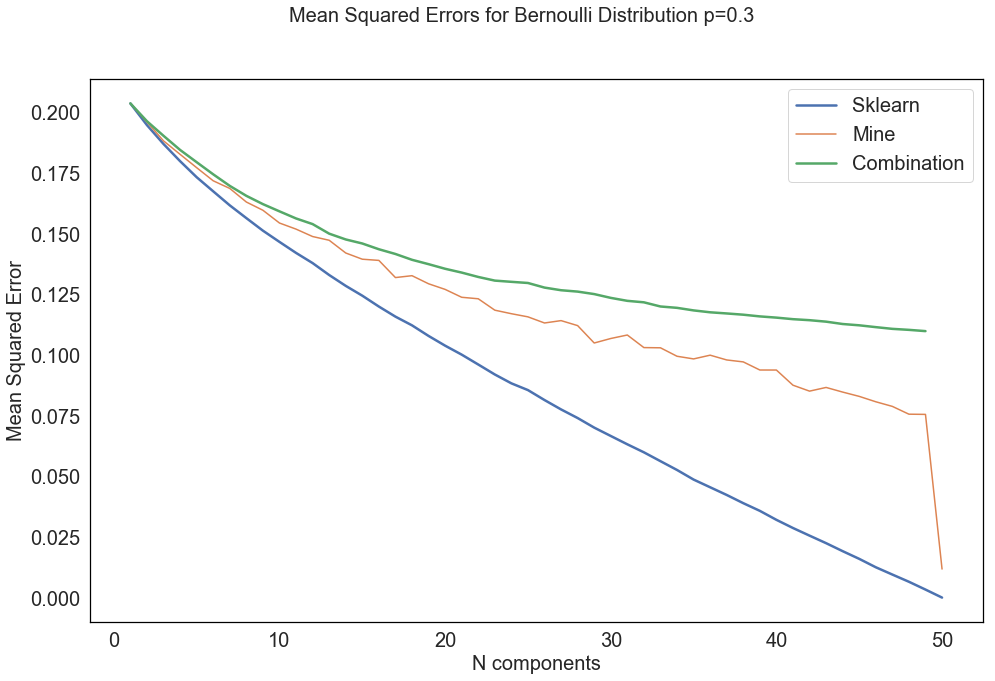

In [50]:
fig_1 = plt.figure(figsize=(16, 10))
ax_1 = fig_1.add_subplot(111)
    
ax_1.plot(np.arange(1, 51), 
                  errorssk, label="Sklearn ", linewidth=2.5)

ax_1.plot(np.arange(1, 51), 
                 errorsmy, label="Mine")

ax_1.plot(np.arange(1, 50), 
                  errorsComb[:-1], label="Combination", linewidth=2.5)

for item in ([ax_1.title, ax_1.xaxis.label, ax_1.yaxis.label] +
             ax_1.get_xticklabels() + ax_1.get_yticklabels()):
    item.set_fontsize(20)
    
ax_1.legend(loc=0, fontsize = 20)
plt.rcParams['axes.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.rcParams['axes.edgecolor'] = 'black'

ax_1.set_xlabel('N components')
ax_1.set_ylabel('Mean Squared Error')
fig_1.suptitle('Mean Squared Errors for Bernoulli Distribution p=0.3', fontsize = 20)
fig_1.savefig('BernoulliGraphs/MeanSquaredErrorsForNMFBernoulliFurther p=0.3.pdf')

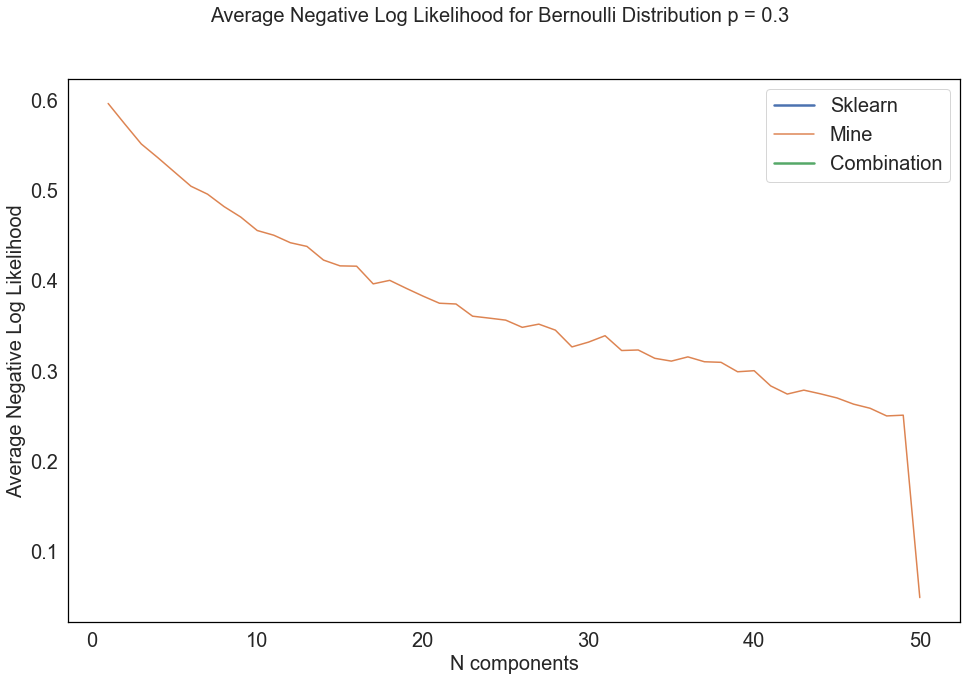

In [51]:
fig_1 = plt.figure(figsize=(16, 10))
ax_1 = fig_1.add_subplot(111)
    
ax_1.plot(np.arange(1, 51), 
                  lsk, label="Sklearn", linewidth=2.5)

ax_1.plot(np.arange(1, 51), 
                 lmy, label="Mine")

ax_1.plot(np.arange(1, 50), 
                 lComb[:-1], label="Combination", linewidth=2.5)

for item in ([ax_1.title, ax_1.xaxis.label, ax_1.yaxis.label] +
             ax_1.get_xticklabels() + ax_1.get_yticklabels()):
    item.set_fontsize(20)
    
ax_1.legend(loc=0, fontsize = 20)
plt.rcParams['axes.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.rcParams['axes.edgecolor'] = 'black'

ax_1.set_xlabel('N components')
ax_1.set_ylabel('Average Negative Log Likelihood')
fig_1.suptitle('Average Negative Log Likelihood for Bernoulli Distribution p = 0.3', fontsize = 20)
fig_1.savefig('BernoulliGraphs/BernoulliNMFAvgNegLogLikelihoodp=0.3.pdf')

#### Check if the Average Negative Likelihhod is Minimized

In [38]:
p = 0.5
rs = RandomState(76321654)
V = bernoulli.rvs(p, size = 10000,  random_state= rs).reshape(200,50)
n = 10

In [40]:
max_iterations = np.arange(1,101)

errorsmy = np.zeros(100)
lmy = np.zeros(100)

errorsSK = np.zeros(100)
lSK = np.zeros(100)

errorsmyComb = np.zeros(100)
lmyComb = np.zeros(100)


n = 10
for max_it in max_iterations:
    print(max_it)
    rs = RandomState(76321654)
    
   
    #My 
    rs = RandomState(76321654)
    nmfM = nmfmy(n_components=n,random_state=rs, max_iterations = max_it, distribution = 'bernoulli', phi_update = True)
    W, H = nmfM.fit_transform(V)
    
    #My Comb
    rs = RandomState(76321654)
    nmfM = nmfmy2(n_components=n,random_state=rs, max_iter = max_it, distribution = 'bernoulli')
    W2 = nmfM.fit_transform(V)
    H2 = nmfM.components_
    
    # Sklearn
    rs = RandomState(76321654)
    nmfS = nmfsk(n_components=n,random_state=rs, max_iter = max_it)
    Ws = nmfS.fit_transform(V)
    Hs = nmfS.components_
    
    # Mean Squared Errors 
    
    diffM = mean_squared_error(V, W2.dot(H2))
    errorsmyComb[max_it-1] = diffM
    
    # Average Neg Log Likelihoods
    
    diffM = neg_log_likelihood_bernoulli(V, W2, H2)
    lmyComb[max_it-1] = diffM / (V.shape[0] * V.shape[1])
    
    # Mean Squared Errors 
    
    diffM = mean_squared_error(V, W.dot(H))
    errorsmy[max_it-1] = diffM
    
    # Average Neg Log Likelihoods
    
    diffM = neg_log_likelihood_bernoulli(V, W, H)
    lmy[max_it-1] = diffM / (V.shape[0] * V.shape[1])
    
    # Mean Squared Errors 
    
    diffS = mean_squared_error(V, Ws.dot(Hs))
    errorsSK[max_it-1] = diffS
    
    # Average Neg Log Likelihoods
    
    diffS = neg_log_likelihood_bernoulli(V, Ws, Hs)
    lSK[max_it-1] = diffS / (V.shape[0] * V.shape[1])

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100


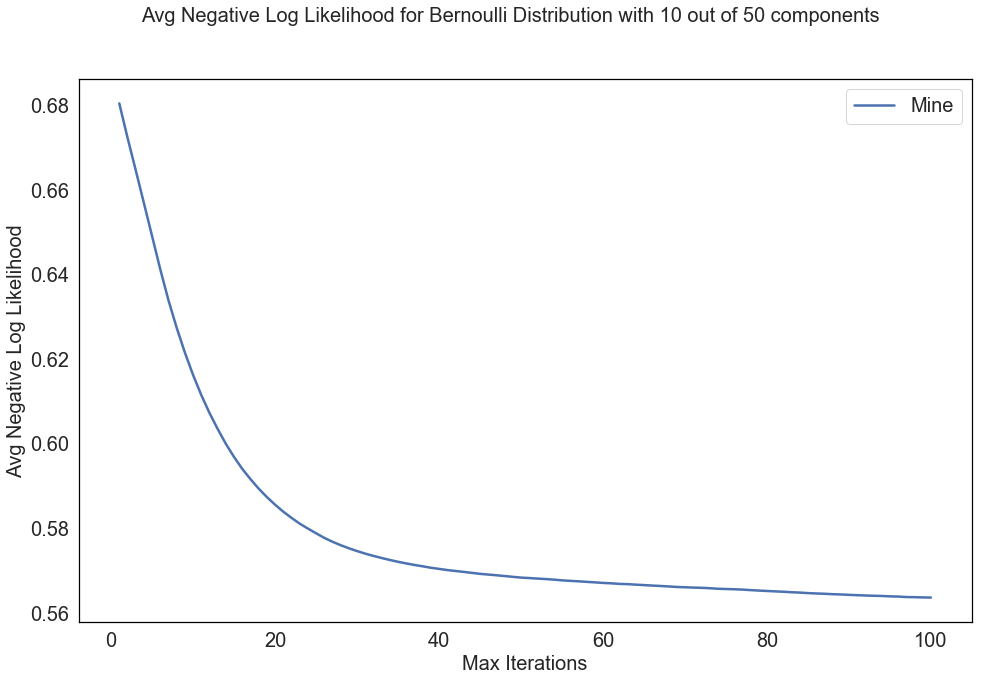

In [46]:
fig_1 = plt.figure(figsize=(16, 10))
ax_1 = fig_1.add_subplot(111)
    

ax_1.plot(max_iterations, 
                  lmy, label="Mine", linewidth=2.5)


for item in ([ax_1.title, ax_1.xaxis.label, ax_1.yaxis.label] +
             ax_1.get_xticklabels() + ax_1.get_yticklabels()):
    item.set_fontsize(20)
    
ax_1.legend(loc=0, fontsize = 20)
plt.rcParams['axes.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.rcParams['axes.edgecolor'] = 'black'

ax_1.set_xlabel('Max Iterations')
ax_1.set_ylabel('Avg Negative Log Likelihood')
fig_1.suptitle('Avg Negative Log Likelihood for Bernoulli Distribution with 10 out of 50 components', fontsize = 20)
fig_1.savefig('BernoulliGraphs/AverageProbabilityNMFBernoulliMaxIterationsFurther.pdf')

#### Check If Bregman Divergences Deacreses

In [42]:
def bregman_div(V,W,H):
    
    A = W.dot(H) 
    
   
    indices = np.where(A>=1)
    A[indices] = 1 - 1e-5

    indices = np.where(A==0)
    A[indices] = 1e-5
   
    first_part = np.multiply(V, np.log( np.divide(V, A) + 1e-5 )) 
    
    
    second_part = np.multiply((1-V), np.log( np.divide((1-V),(1-A) ) + 1e-5 ) )
    breg = first_part + second_part
    
    breg[np.where(np.isnan(breg))] = np.nanmax(breg)
    
    total = np.sum(breg)
    
    return total

In [43]:
max_iterations = np.arange(1,101)

bregMy = np.zeros(100)
bregSK = np.zeros(100)
bregComb = np.zeros(100)


n = 10
for max_it in max_iterations:
    print(max_it)
    rs = RandomState(76321654)
    
   
    #My 
    rs = RandomState(76321654)
    nmfM = nmfmy(n_components=n,random_state=rs, max_iterations = max_it, distribution = 'bernoulli', phi_update = True)
    W, H = nmfM.fit_transform(V)
    
    #My Comb
    rs = RandomState(76321654)
    nmfM = nmfmy2(n_components=n,random_state=rs, max_iter = max_it, distribution = 'bernoulli')
    W2 = nmfM.fit_transform(V)
    H2 = nmfM.components_
    
    # Sklearn
    rs = RandomState(76321654)
    nmfS = nmfsk(n_components=n,random_state=rs, max_iter = max_it)
    Ws = nmfS.fit_transform(V)
    Hs = nmfS.components_
    
    # Bregman Divergence Error Comb
    
    bregComb[max_it-1] = bregman_div(V, W2, H2)
    
    # Bregman Divergence Error My
    
    bregMy[max_it-1] = bregman_div(V, W, H)
    
     # Bregman Divergence Error Sklearn
    
    bregSK[max_it-1] = bregman_div(V, Ws, Hs)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100


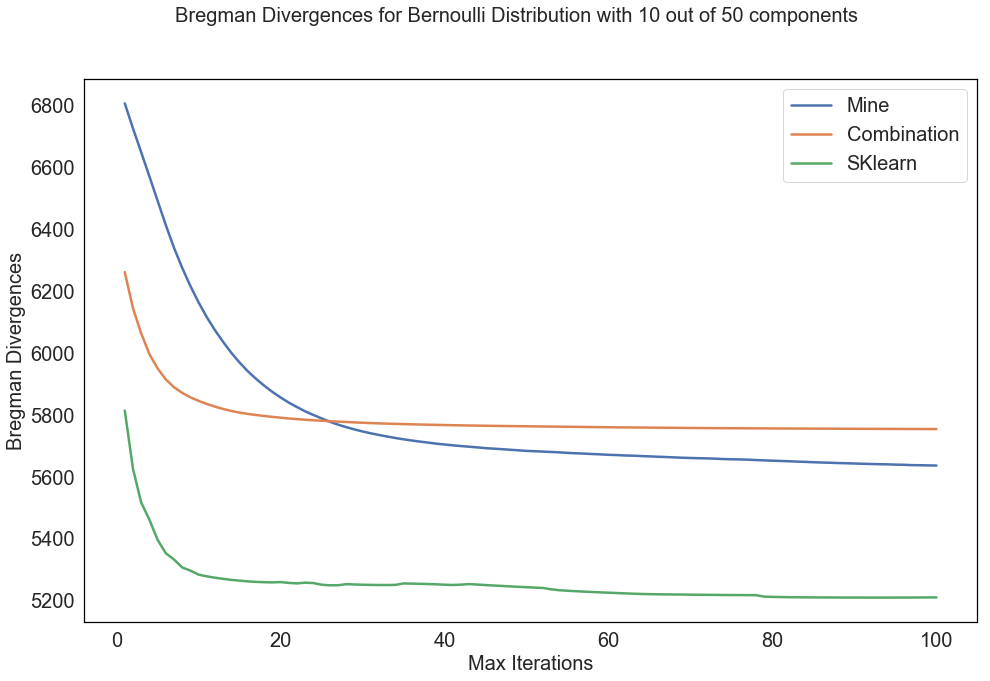

In [44]:
fig_1 = plt.figure(figsize=(16, 10))
ax_1 = fig_1.add_subplot(111)
    

ax_1.plot(max_iterations, 
                  bregMy, label="Mine", linewidth=2.5)

ax_1.plot(max_iterations, 
                  bregComb, label="Combination", linewidth=2.5)

ax_1.plot(max_iterations, 
                  bregSK, label="SKlearn", linewidth=2.5)

for item in ([ax_1.title, ax_1.xaxis.label, ax_1.yaxis.label] +
             ax_1.get_xticklabels() + ax_1.get_yticklabels()):
    item.set_fontsize(20)
    
ax_1.legend(loc=0, fontsize = 20)
plt.rcParams['axes.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.rcParams['axes.edgecolor'] = 'black'

ax_1.set_xlabel('Max Iterations')
ax_1.set_ylabel('Bregman Divergences')
fig_1.suptitle('Bregman Divergences for Bernoulli Distribution with 10 out of 50 components', fontsize = 20)
fig_1.savefig('AverageProbabilityNMFBernoulliMaxIterationsFurtherBregman.pdf')

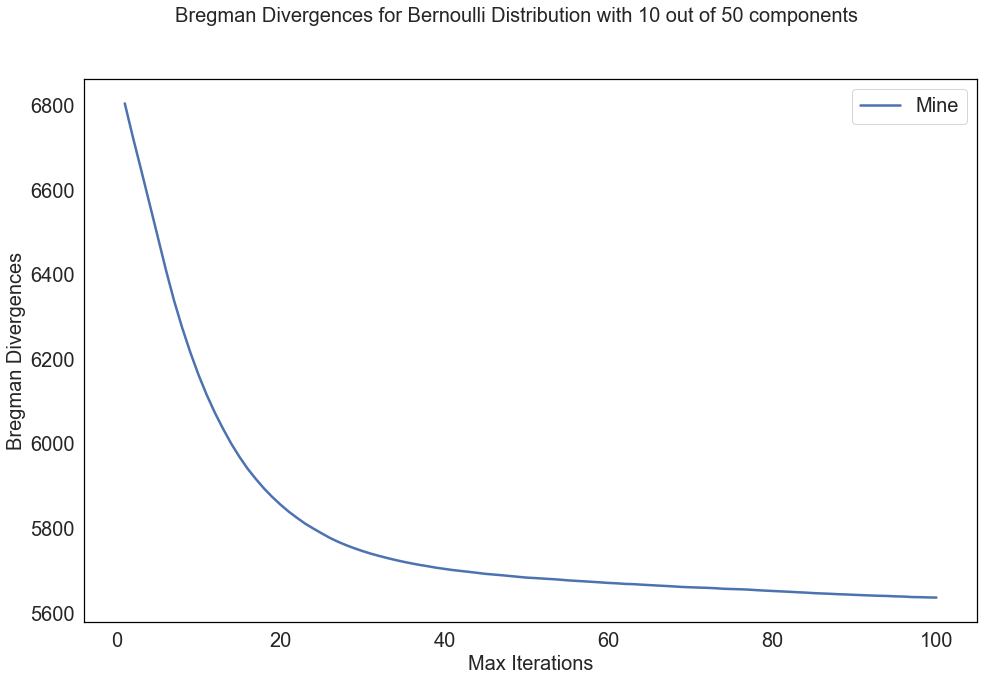

In [47]:
fig_1 = plt.figure(figsize=(16, 10))
ax_1 = fig_1.add_subplot(111)
    

ax_1.plot(max_iterations, 
                  bregMy, label="Mine", linewidth=2.5)

#ax_1.plot(max_iterations, 
#                  bregComb, label="Combination", linewidth=2.5)


for item in ([ax_1.title, ax_1.xaxis.label, ax_1.yaxis.label] +
             ax_1.get_xticklabels() + ax_1.get_yticklabels()):
    item.set_fontsize(20)
    
ax_1.legend(loc=0, fontsize = 20)
plt.rcParams['axes.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.rcParams['axes.edgecolor'] = 'black'

ax_1.set_xlabel('Max Iterations')
ax_1.set_ylabel('Bregman Divergences')
fig_1.suptitle('Bregman Divergences for Bernoulli Distribution with 10 out of 50 components', fontsize = 20)
fig_1.savefig('BernoulliGraphs/AverageProbabilityNMFBernoulliMaxIterationsFurtherBregman.pdf')